<a href="https://colab.research.google.com/github/Jonas1997Pereira/Introdu-o-Ci-ncia-de-Dados/blob/main/07_binary_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Passo 1: Importação das Bibliotecas Necessárias**

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, ConfusionMatrixDisplay

# Configuração de semente para reprodutibilidade
np.random.seed(42)


**Passo 2: Criação do Conjunto de Dados Sintéticos**

In [35]:
# Gerando um conjunto de dados sintético com escalas desiguais
n_samples = 200

# Variáveis preditoras
profundidade_banda_rodagem = np.random.uniform(2, 10, n_samples)  # Ajustado para refletir 2 mm como limite de desgaste
desgaste_percentual = np.random.uniform(0, 100, n_samples)
km_rodados = np.random.uniform(5000, 60000, n_samples)  # Ajustado para refletir km mais alto

# Variável alvo
# Classe 1: pneu velho | Classe 0: pneu novo
classes = np.where((profundidade_banda_rodagem < 3) | (desgaste_percentual > 50) | (km_rodados > 40000), 1, 0)

# Conjunto de dados
X = np.column_stack((profundidade_banda_rodagem, desgaste_percentual, km_rodados))
y = classes


**Passo 3: Explicação sobre a Padronização**

### Por que é necessário padronizar os dados?

Quando as variáveis preditoras possuem escalas muito diferentes, como é o caso deste conjunto de dados, o algoritmo kNN (que calcula distâncias) pode ser influenciado de forma desproporcional pelas variáveis com escalas maiores. Isso ocorre porque variáveis em escalas maiores têm mais peso na medida de distância Euclidiana, por exemplo. A padronização resolve esse problema, ajustando todas as variáveis para uma média de 0 e um desvio padrão de 1, tornando a influência das variáveis mais equilibrada.


**Passo 4: Aplicação da Padronização**

In [36]:
# Aplicando a padronização aos dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Salvando os dados antes e depois da padronização
df_original = pd.DataFrame(X, columns=['Profundidade_Banda_Rodagem', 'Desgaste_Percentual', 'Km_Rodados'])
df_scaled = pd.DataFrame(X_scaled, columns=['Profundidade_Banda_Rodagem', 'Desgaste_Percentual', 'Km_Rodados'])

# Exibindo os dados originais e padronizados
print("Dados originais:\n", df_original.head())
print("\nDados padronizados:\n", df_scaled.head())


Dados originais:
    Profundidade_Banda_Rodagem  Desgaste_Percentual    Km_Rodados
0                    4.996321            64.203165  10671.812786
1                    9.605714             8.413996  54640.409867
2                    7.855952            16.162871  32788.880485
3                    6.789268            89.855419  50455.160636
4                    3.248149            60.642906  22602.728057

Dados padronizados:
    Profundidade_Banda_Rodagem  Desgaste_Percentual  Km_Rodados
0                   -0.372140             0.470994   -1.362137
1                    1.586615            -1.437843    1.245778
2                    0.843056            -1.172714   -0.050305
3                    0.389770             1.348691    0.997537
4                   -1.115023             0.349180   -0.654477


**Passo 5: Divisão dos Dados em Treino e Teste**

In [37]:
# Dividindo o conjunto de dados em treino e teste (sem padronização)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Dividindo o conjunto de dados em treino e teste (com padronização)
X_train_scaled, X_test_scaled = train_test_split(X_scaled, test_size=0.3, random_state=42)


**Passo 6: Treinamento do Algoritmo kNN**

In [38]:
# Treinando o modelo kNN (sem padronização)
k = 5
knn_no_scaling = KNeighborsClassifier(n_neighbors=k)
knn_no_scaling.fit(X_train, y_train)

# Treinando o modelo kNN (com padronização)
knn_with_scaling = KNeighborsClassifier(n_neighbors=k)
knn_with_scaling.fit(X_train_scaled, y_train)


KNeighborsClassifier()

**Passo 7: Teste do Algoritmo kNN**

In [39]:
# Avaliação do modelo sem padronização
y_pred_no_scaling = knn_no_scaling.predict(X_test)

# Avaliação do modelo com padronização
y_pred_with_scaling = knn_with_scaling.predict(X_test_scaled)


**Passo 8: Aplicação das Métricas de Avaliação**

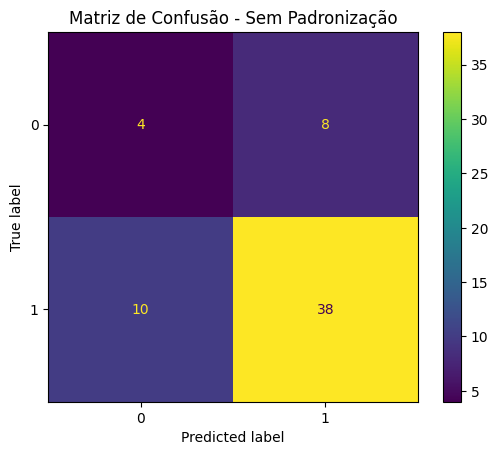

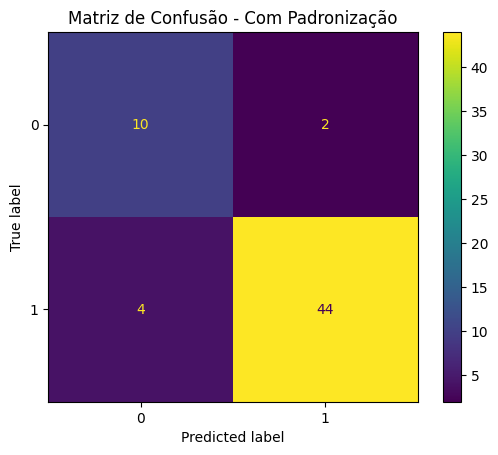

In [40]:
# Matriz de Confusão - Sem Padronização
cm_no_scaling = confusion_matrix(y_test, y_pred_no_scaling)
ConfusionMatrixDisplay(cm_no_scaling).plot()
plt.title("Matriz de Confusão - Sem Padronização")
plt.show()

# Matriz de Confusão - Com Padronização
cm_with_scaling = confusion_matrix(y_test, y_pred_with_scaling)
ConfusionMatrixDisplay(cm_with_scaling).plot()
plt.title("Matriz de Confusão - Com Padronização")
plt.show()


**Curva ROC e AUC**

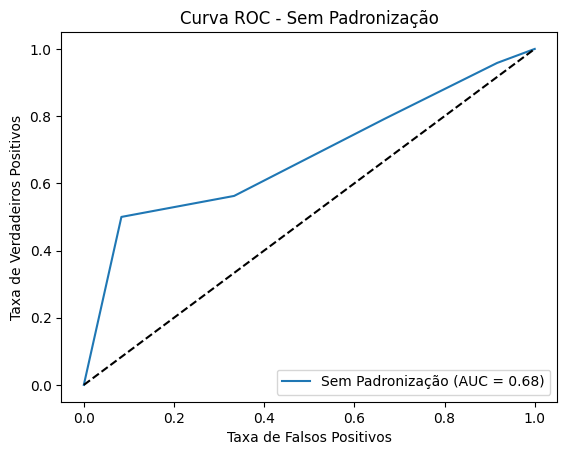

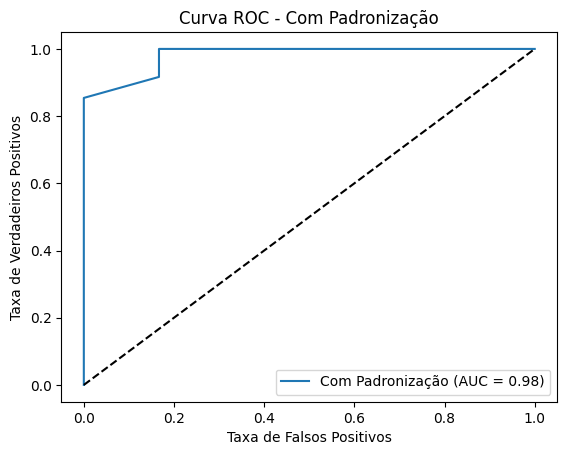

In [41]:
# Curva ROC e AUC - Sem Padronização
y_prob_no_scaling = knn_no_scaling.predict_proba(X_test)[:, 1]
fpr_no_scaling, tpr_no_scaling, thresholds_no_scaling = roc_curve(y_test, y_prob_no_scaling)
auc_score_no_scaling = roc_auc_score(y_test, y_prob_no_scaling)

plt.plot(fpr_no_scaling, tpr_no_scaling, label=f'Sem Padronização (AUC = {auc_score_no_scaling:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC - Sem Padronização')
plt.legend(loc='lower right')
plt.show()

# Curva ROC e AUC - Com Padronização
y_prob_with_scaling = knn_with_scaling.predict_proba(X_test_scaled)[:, 1]
fpr_with_scaling, tpr_with_scaling, thresholds_with_scaling = roc_curve(y_test, y_prob_with_scaling)
auc_score_with_scaling = roc_auc_score(y_test, y_prob_with_scaling)

plt.plot(fpr_with_scaling, tpr_with_scaling, label=f'Com Padronização (AUC = {auc_score_with_scaling:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC - Com Padronização')
plt.legend(loc='lower right')
plt.show()


**Erro em Função do k**

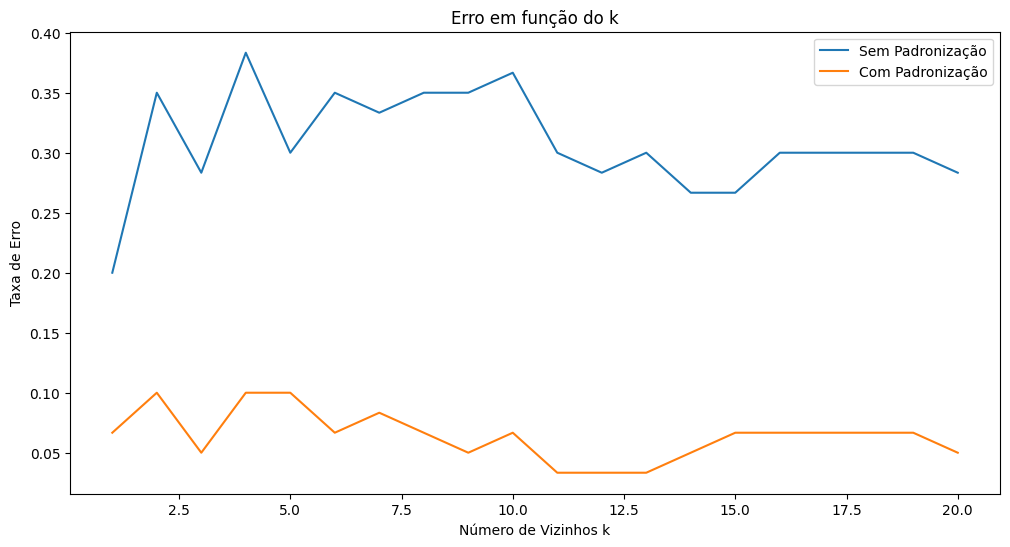

In [42]:
# Análise do erro em função do k
errors_no_scaling = []
errors_with_scaling = []

# Testando valores de k de 1 a 20
for i in range(1, 21):
    knn_no_scaling = KNeighborsClassifier(n_neighbors=i)
    knn_no_scaling.fit(X_train, y_train)
    pred_i_no_scaling = knn_no_scaling.predict(X_test)
    errors_no_scaling.append(np.mean(pred_i_no_scaling != y_test))

    knn_with_scaling = KNeighborsClassifier(n_neighbors=i)
    knn_with_scaling.fit(X_train_scaled, y_train)
    pred_i_with_scaling = knn_with_scaling.predict(X_test_scaled)
    errors_with_scaling.append(np.mean(pred_i_with_scaling != y_test))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 21), errors_no_scaling, label='Sem Padronização')
plt.plot(range(1, 21), errors_with_scaling, label='Com Padronização')
plt.legend()
plt.title('Erro em função do k')
plt.xlabel('Número de Vizinhos k')
plt.ylabel('Taxa de Erro')
plt.show()


**Fronteira de Decisão entre Variáveis**

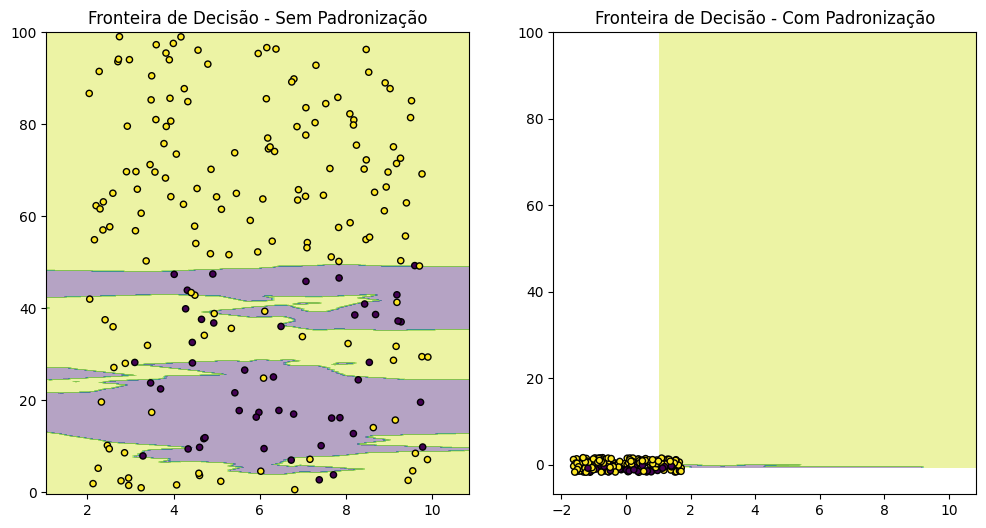

In [43]:
# Análise da fronteira de decisão - Opcional

# Para visualizar a fronteira de decisão em 2D, normalmente se escolhe duas variáveis
# Aqui, usaremos apenas 'Profundidade_Banda_Rodagem' e 'Desgaste_Percentual' para uma ilustração simples

from matplotlib.colors import ListedColormap

# Selecionando as duas primeiras variáveis para visualização
X_vis = X[:, :2]
X_vis_scaled = X_scaled[:, :2]

X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis, y, test_size=0.3, random_state=42)
X_train_scaled_vis, X_test_scaled_vis = train_test_split(X_vis_scaled, test_size=0.3, random_state=42)

knn_no_scaling_vis = KNeighborsClassifier(n_neighbors=5)
knn_no_scaling_vis.fit(X_train_vis, y_train_vis)

knn_with_scaling_vis = KNeighborsClassifier(n_neighbors=5)
knn_with_scaling_vis.fit(X_train_scaled_vis, y_train_vis)

# Definindo os limites do gráfico
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Plotando a fronteira de decisão
plt.figure(figsize=(12, 6))

Z_no_scaling = knn_no_scaling_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z_no_scaling = Z_no_scaling.reshape(xx.shape)

Z_with_scaling = knn_with_scaling_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z_with_scaling = Z_with_scaling.reshape(xx.shape)

# Gráfico Sem Padronização
plt.subplot(1, 2, 1)
plt.contourf(xx, yy, Z_no_scaling, alpha=0.4)
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y, s=20, edgecolor='k')
plt.title('Fronteira de Decisão - Sem Padronização')

# Gráfico Com Padronização
plt.subplot(1, 2, 2)
plt.contourf(xx, yy, Z_with_scaling, alpha=0.4)
plt.scatter(X_vis_scaled[:, 0], X_vis_scaled[:, 1], c=y, s=20, edgecolor='k')
plt.title('Fronteira de Decisão - Com Padronização')

plt.show()


**Passo 9: Comentários sobre os Resultados**

### Comentários sobre os Resultados

Podemos observar que a padronização dos dados teve um impacto significativo no desempenho do algoritmo kNN. A matriz de confusão e a curva ROC mostram uma melhor performance no conjunto padronizado. Isso ocorre porque o algoritmo kNN se baseia na distância entre os pontos, e variáveis em escalas muito diferentes podem distorcer essa medida de distância, levando a predições menos precisas.

A análise do erro em função de k também mostra uma diferença na taxa de erro, indicando que a escolha do valor de k pode ser mais robusta em dados padronizados.

Por fim, a fronteira de decisão ilustra visualmente como a padronização pode afetar a capacidade do kNN de separar as classes corretamente.


**Passo 10: Conclusão**

### Conclusão

O algoritmo kNN é altamente sensível às escalas das variáveis preditoras, como demonstrado neste notebook. A padronização dos dados é uma etapa essencial no pré-processamento quando se utiliza kNN, pois ajuda a garantir que todas as variáveis contribuam igualmente para o cálculo das distâncias. As métricas de avaliação, incluindo matriz de confusão, curva ROC, e a análise do erro em função do número de vizinhos k, indicam que o desempenho do kNN melhora significativamente com a padronização, resultando em uma melhor generalização no conjunto de teste.
